In [1]:
# Importamos las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set()
%matplotlib inline

In [2]:
# Cargamos el dataset y mostramos los 5 primeros registros.
raw_data = pd.read_csv('train.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Mostramos un resumen de los datos
raw_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hippach, Miss. Jean Gertrude",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
data = raw_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
mv = data.isnull().sum()
mv

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Survived,Pclass,Sex,Age,Fare
count,714.000000,714.000000,714,714.000000,714.000000
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,male,NaN,NaN
freq,NaN,NaN,453,NaN,NaN
mean,0.406162,2.236695,NaN,29.699118,34.694514
std,0.491460,0.838250,NaN,14.526497,52.918930
min,0.000000,1.000000,NaN,0.420000,0.000000
25%,0.000000,1.000000,NaN,20.125000,8.050000
50%,0.000000,2.000000,NaN,28.000000,15.741700
75%,1.000000,3.000000,NaN,38.000000,33.375000


In [7]:
data_with_dummies = pd.get_dummies(data_no_mv, drop_first=True)
data_with_dummies.head()

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


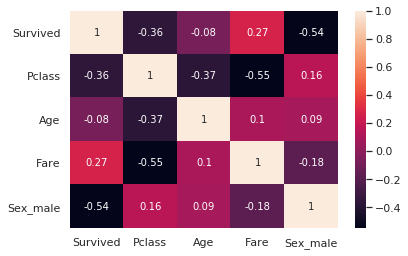

In [8]:
corr_matrix = data_with_dummies.corr().round(2)  # Redondear a 2 decimales
sns.heatmap(data=corr_matrix, annot=True)  # Establecemos annot = True para imprimir los valores dentro de los cuadrados
plt.show()

In [9]:
data_no_multicollinearity = data_with_dummies.drop('Fare', axis=1)
data_no_multicollinearity.head()

,Survived,Pclass,Age,Sex_male
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1


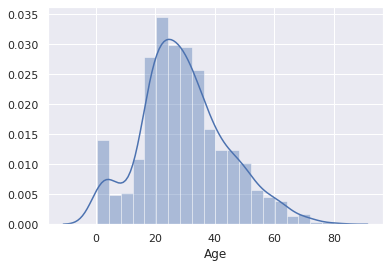

In [10]:
sns.distplot(data_no_multicollinearity['Age'])
plt.show()

In [11]:
# Declaramos las características y la etiqueta
features = data_no_multicollinearity.drop('Survived', axis=1)
label = data_no_multicollinearity['Survived']

In [12]:
# Dividimos los datos en conjuntos de entrenamiento y prueba, en una proporción de 80:20
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)

In [13]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [14]:
pred = clf.predict(X_test)

In [15]:
acc = accuracy_score(y_test, pred)
acc

0.7692307692307693

In [16]:
#Creamos una matriz de confusión
matrix = pd.DataFrame(
        confusion_matrix(y_test, pred),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,74,12
Actual 1,21,36


In [17]:
#Generamos un informe de clasificación
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        86
           1       0.75      0.63      0.69        57

    accuracy                           0.77       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.77      0.77      0.77       143

